In [19]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read json file as pandas dataframe
df = pd.read_json('logins.json')

In [3]:
#examine dataframe
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
#look at the number of data points, range, and type
df['login_time'].describe()

count                   93142
unique                  92265
top       1970-02-12 11:16:53
freq                        3
first     1970-01-01 20:12:16
last      1970-04-13 18:57:38
Name: login_time, dtype: object

In [8]:
#convert type to datetime
pd.to_datetime(df['login_time'])

0       1970-01-01 20:13:18
1       1970-01-01 20:16:10
2       1970-01-01 20:16:37
3       1970-01-01 20:16:36
4       1970-01-01 20:26:21
5       1970-01-01 20:21:41
6       1970-01-01 20:12:16
7       1970-01-01 20:35:47
8       1970-01-01 20:35:38
9       1970-01-01 20:47:52
10      1970-01-01 20:26:05
11      1970-01-01 20:31:03
12      1970-01-01 20:34:46
13      1970-01-01 20:36:34
14      1970-01-01 20:39:25
15      1970-01-01 20:40:37
16      1970-01-01 20:34:58
17      1970-01-01 20:43:59
18      1970-01-01 20:47:46
19      1970-01-01 20:46:34
20      1970-01-01 20:56:07
21      1970-01-01 20:49:12
22      1970-01-01 20:59:06
23      1970-01-01 20:59:59
24      1970-01-01 21:15:01
25      1970-01-01 21:09:24
26      1970-01-01 21:19:24
27      1970-01-01 21:20:53
28      1970-01-01 21:29:19
29      1970-01-01 21:58:05
                ...        
93112   1970-04-13 17:38:24
93113   1970-04-13 17:37:19
93114   1970-04-13 17:45:35
93115   1970-04-13 17:39:02
93116   1970-04-13 1

In [42]:
#count in 15 minute intervals
df.index = df['login_time']
counts_df = df.resample('15Min', how = {'login_time':'count'})
counts_df.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


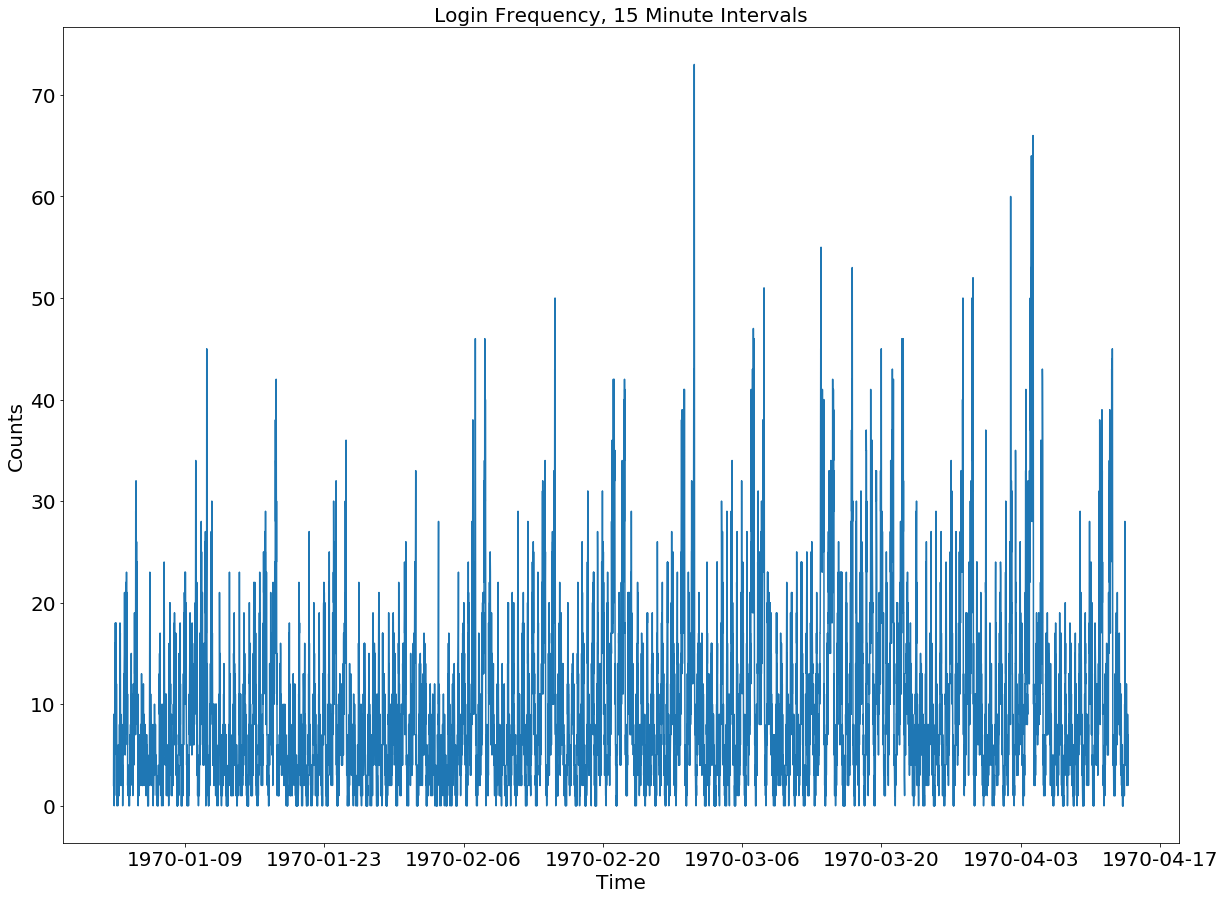

In [45]:
#plot all data
plt.figure(figsize=(20,15))
plt.plot(counts_df)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Login Frequency, 15 Minute Intervals', fontsize=20)
plt.show()

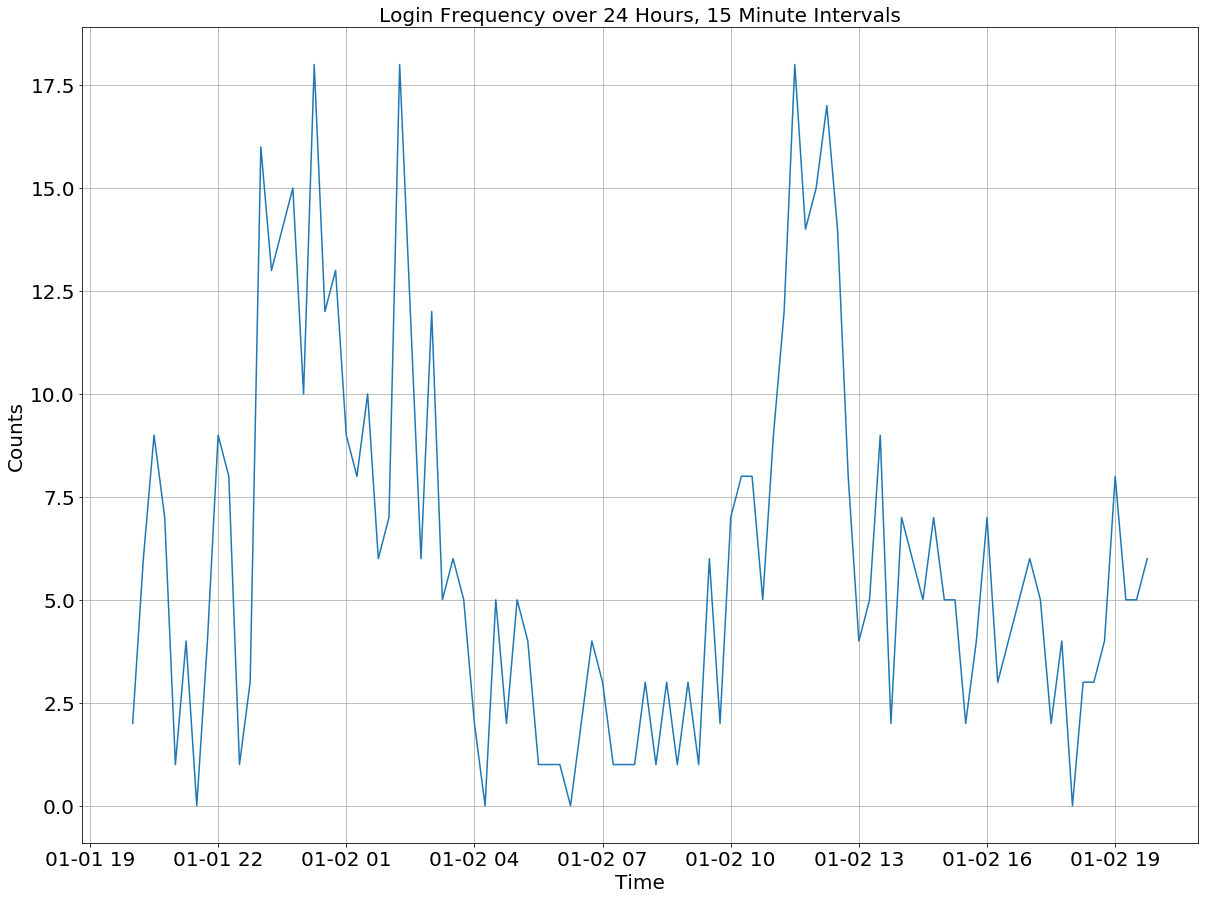

In [46]:
#plot data over a one day (96 data point) range
plt.figure(figsize=(20,15))
plt.plot(counts_df[0:96])
plt.grid('on','both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Login Frequency over 24 Hours, 15 Minute Intervals', fontsize=20)
plt.show()

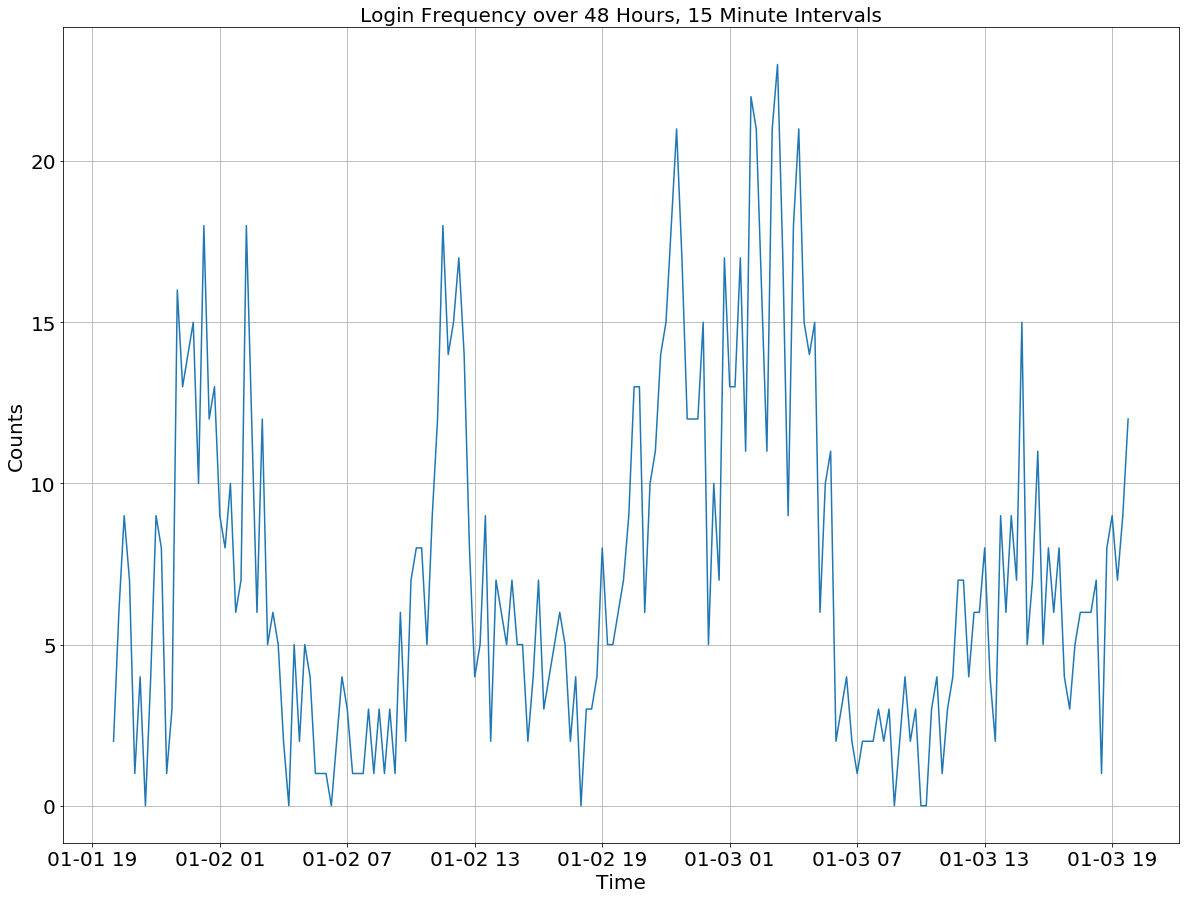

In [47]:
#plot all data over a two day (192 data point) range
plt.figure(figsize=(20,15))
plt.plot(counts_df[0:192])
plt.grid('on','both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Login Frequency over 48 Hours, 15 Minute Intervals', fontsize=20)
plt.show()

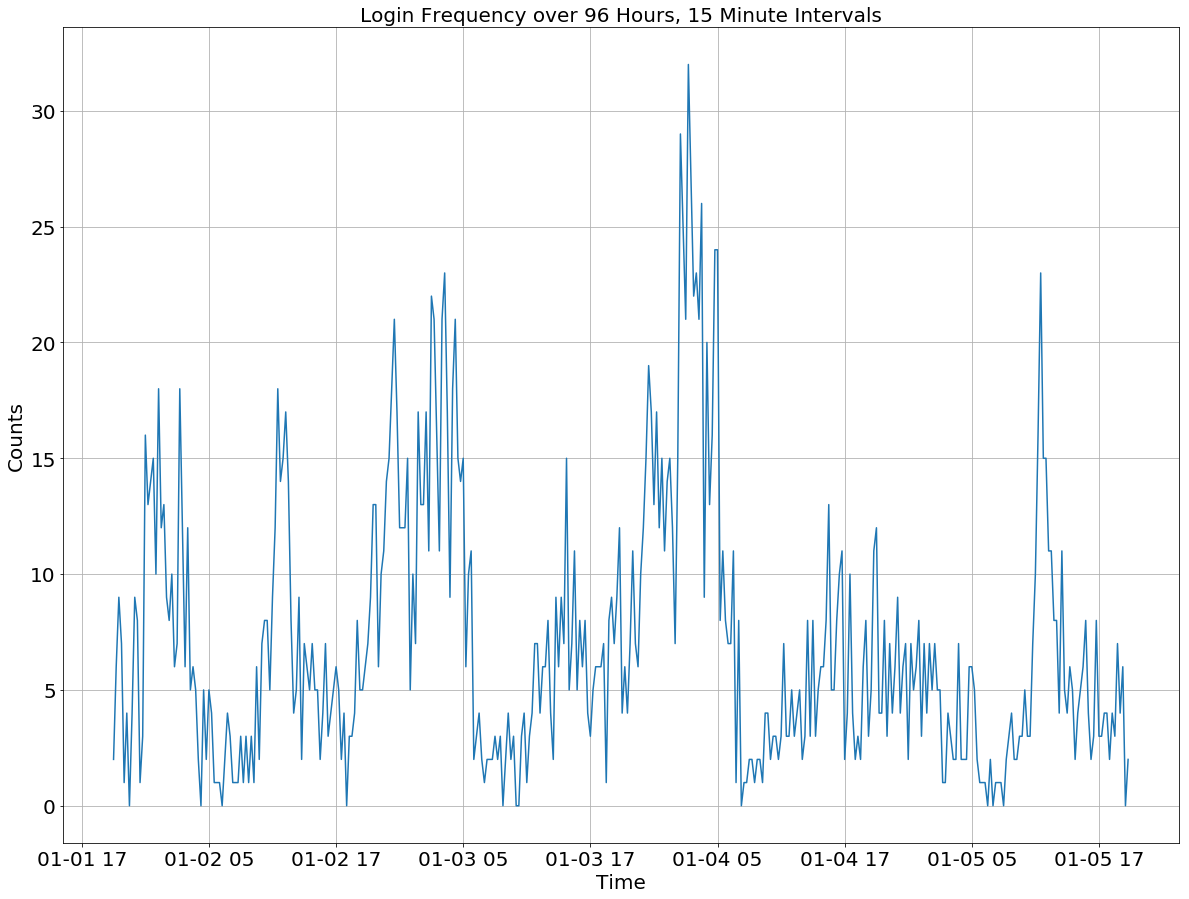

In [48]:
#plot all data over a four day (192 data point) range
plt.figure(figsize=(20,15))
plt.plot(counts_df[0:384])
plt.grid('on','both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Login Frequency over 96 Hours, 15 Minute Intervals', fontsize=20)
plt.show()

Plotting all of the data shows that there is clearly a cyclic property to the data. However, the full plot is too crowded to see exactly when the data peaks each day. Plotting the data across a 24 hour period shows a peak around midnight and noon. Expanding this time period to two days (48 hours) and four days (96 hours) shows that this cyclic nature seems to be consident accross the data, even though the height and width of the peaks are variable. 